In [2]:
import numpy as np

In [3]:
def de_normalize(num):
  return (num * 255).astype(np.uint8)

In [4]:
def de_normalize(num):
  return (num * 255).astype(np.uint8)

In [5]:
# Load the data
data = np.load('C:\\Users\\deeks_w4ub1k8\\Documents\\Dataset numpy array(converted)\\rawTrainMask.npy')

# Process the data
def de_normalize(data):
    # Assuming de_normalize is a custom function; define it here
    # Replace the content of this function with the actual de-normalization logic
    return data * 255  # Example: Scale back normalized data

processed_data = de_normalize(data)

# Save the processed data to the same or another local path
output_path = 'C:\\Users\\deeks_w4ub1k8\\Documents\\Dataset numpy array(converted)\\processed_rawTrainMask.npy'
np.save(output_path, processed_data)

print(f"File saved successfully at {output_path}!")

File saved successfully at C:\Users\deeks_w4ub1k8\Documents\Dataset numpy array(converted)\processed_rawTrainMask.npy!


In [ ]:
print(np.load('C:\\Users\\deeks_w4ub1k8\\Documents\\Dataset numpy array(converted)\\rawTrainMask.npy'))

[[[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [ 35  65  90]
   [ 70 130 180]
   ...
   [107 142  35]
   [107 142  35]
   [  0   0   0]]

  [[  0   0   0]
   [ 35  65  90]
   [ 70 130 180]
   ...
   [107 142  35]
   [107 142  35]
   [  0   0   0]]

  ...

  [[  0   0   0]
   [ 64  32  64]
   [128  64 128]
   ...
   [128  64 128]
   [128  64 128]
   [  0   0   0]]

  [[  0   0   0]
   [ 64  32  64]
   [128  64 128]
   ...
   [128  64 128]
   [128  64 128]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [ 54  71  18]
   [107 142  35]
   ...
   [ 70  70  70]
   [ 70  70  70]
   [  0   0   0]]

  [[  0   0   0]
   [ 54  71  18]
   [107 142  35]
   ...
   [ 70  70  70]
   [ 70  70  70]
   [  0   0

In [ ]:
print(np.load('C:\\Users\\deeks_w4ub1k8\\Documents\\Dataset numpy array(converted)\\rawTrainMask.npy').dtype)

uint8


In [ ]:
print(np.load('C:\\Users\\deeks_w4ub1k8\\Documents\\Dataset numpy array(converted)\\rawTrainMask.npy').shape)

(1046, 256, 512, 3)


In [9]:
color_to_class_mapping = {
    (0, 0, 0): 0,
    (0, 0, 142): 1,
    (70, 70, 70): 2,
    (70, 130, 180): 3,
    (107, 142, 35): 4,
    (119, 11, 32): 5,
    (128, 64, 128): 6,
    (152, 251, 152): 7,
    (153, 153, 153): 8,
    (220, 20, 60): 9,
    (220, 220, 0): 10,
    (244, 35, 232): 11,
    (255, 0, 0): 12
}

def rgb_to_class_index(rgb_mask, color_to_class_mapping):
    class_indexed_mask = np.zeros((rgb_mask.shape[0], rgb_mask.shape[1]), dtype=np.int32)

    for rgb_color, class_idx in color_to_class_mapping.items():
        match = np.all(rgb_mask == rgb_color, axis=-1)
        class_indexed_mask[match] = class_idx
    return class_indexed_mask.astype(np.uint8)

In [ ]:
rawTrainMaskClass_labelled = []
for i in np.load('C:\\Users\\deeks_w4ub1k8\\Documents\\Dataset numpy array(converted)\\rawTrainMask.npy'):
  rawTrainMaskClass_labelled.append(rgb_to_class_index(i, color_to_class_mapping))

In [ ]:
np.save('C:\\Users\\deeks_w4ub1k8\\Documents\\Dataset numpy array(converted)\\rawTrainMaskClass_labelled.npy', rawTrainMaskClass_labelled)

In [ ]:
print(np.load('C:\\Users\\deeks_w4ub1k8\\Documents\\Dataset numpy array(converted)\\rawTrainMaskClass_labelled.npy').shape)

(1046, 256, 512)


In [25]:
dir = 'C:\\Users\\deeks_w4ub1k8\\Documents'
dir_2 = 'C:\\Users\\deeks_w4ub1k8\\Documents\\Dataset numpy array(converted)'

In [14]:
import os
import cv2
import random
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

In [15]:
def resize_image(image_array, size=(512, 256)):
    image = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
    return cv2.resize(image, size, interpolation=cv2.INTER_NEAREST)

def normalize_image(image):
    return image / 255.0

In [16]:
# defining encoder Path
inputs = tf.keras.layers.Input((256, 512, 3))

c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

# defining decoder path
u6 = tf.keras.layers.Conv2DTranspose(128, (3, 3), strides = (2, 2), padding = 'same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (3, 3), strides = (2, 2), padding = 'same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (3, 3), strides = (2, 2), padding = 'same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (3, 3), strides = (2, 2), padding = 'same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1])
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

output = tf.keras.layers.Conv2D(13, (1, 1), activation = 'sigmoid')(c9)
model = tf.keras.Model(inputs = [inputs], outputs = [output])

## instanctiating model
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 512,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 512,  │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256, 512,  │          0 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 512,  │      2,320 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 256,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 256,  │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128, 256,  │          0 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 256,  │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 128,   │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 128,   │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64, 128,   │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 128,   │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 64,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 64,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32, 64,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 64,    │    147,584 │ dropout_3[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 32,    │          0 │ conv2d_7[0][0]  

 Total params: 2,158,909 (8.24 MB)

 Trainable params: 2,158,909 (8.24 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Ensure base directory and subdirectories exist
os.makedirs(dir, exist_ok=True)
os.makedirs(os.path.join(dir, 'model_for_SS_CP.keras'), exist_ok=True)  # Model checkpoint directory
os.makedirs(os.path.join(dir, 'logs'), exist_ok=True)  # Logs directory

In [18]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(dir + '/model_for_SS_CP.keras', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6),
        tf.keras.callbacks.TensorBoard(log_dir=dir + '/logs')
        ]

In [19]:
rawTrain = np.load(dir_2 + '/rawTrain.npy')
rawTrainMask = np.load(dir_2 + '/rawTrainMask.npy')

In [20]:
#7th nov
results = model.fit(np.load(dir_2 + '/rawTrain.npy')[:270], np.load(dir_2 + '/rawTrainMaskClass_labelled.npy')[:270], validation_split=0.09, batch_size=16, epochs=40, callbacks=callbacks)

Epoch 1/40


c:\Users\deeks_w4ub1k8\Desktop\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.1206 - loss: 2.5478 - val_accuracy: 0.2533 - val_loss: 2.3333
Epoch 2/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.2559 - loss: 2.3072 - val_accuracy: 0.3502 - val_loss: 2.0736
Epoch 3/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.3210 - loss: 2.0393 - val_accuracy: 0.3510 - val_loss: 1.8180
Epoch 4/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.3401 - loss: 1.8643 - val_accuracy: 0.3681 - val_loss: 1.7554
Epoch 5/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.4626 - loss: 1.6100 - val_accuracy: 0.4994 - val_loss: 1.6809
Epoch 6/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.5401 - loss: 1.3782 - val_accuracy: 0.5059 - val_loss: 1.5573
Epoch 7/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.5689 - loss: 1.2617 - val_accuracy: 0.5333 - val_loss: 1.4949
Epoch 8/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.5800 - loss: 1.2174 - val_accuracy: 0.4964 - val_loss: 1.5003
Epo

In [21]:
#7th nov
results = model.fit(np.load(dir_2 + '/rawTrain.npy')[:270], np.load(dir_2 + '/rawTrainMaskClass_labelled.npy')[:270], validation_split=0.09, batch_size=16, epochs=10, callbacks=callbacks)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.7620 - loss: 0.7398 - val_accuracy: 0.7062 - val_loss: 0.9705
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.7752 - loss: 0.7002 - val_accuracy: 0.7234 - val_loss: 0.9144
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.7728 - loss: 0.7132 - val_accuracy: 0.7202 - val_loss: 0.8607
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.7774 - loss: 0.6944 - val_accuracy: 0.7599 - val_loss: 0.7474
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.7995 - loss: 0.6339 - val_accuracy: 0.7708 - val_loss: 0.6901
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.8054 - loss: 0.6158 - val_accuracy: 0.7515 - val_loss: 0.7943
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.8127 - loss: 0.5989 - val_accuracy: 0.7370 - val_loss: 0.8708
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.8128 - loss: 0.5943 - val_accuracy: 0.7368 - val_loss:

In [29]:
import cv2
import numpy as np

# Function to resize the image
def resize_image(img, size):
    return cv2.resize(img, size)

# Function to normalize the image
def normalize_image(img):
    if img is None:  # Check if img is None
        print("Error: Image not loaded. Check file path and permissions.")
        return None
    return img / 255.0  # Normalize to [0, 1]

# Correct file path
test_img_path = 'C:\\Users\\deeks_w4ub1k8\\Documents\\Dataset numpy array(converted)\\frankfurt_000000_002196_leftImg8bit.png'

# Print the path to verify
print("Image path:", test_img_path)

# Try to read the image and handle errors
try:
    img = cv2.imread(test_img_path)
    if img is None:
        raise FileNotFoundError(f"Could not open or find the image: {test_img_path}")
except FileNotFoundError as e:
    print(f"Error: {e}")
    # Handle the error, e.g., exit the script or use a default image
    img = None
else:
    test_img = normalize_image(resize_image(img, (512, 256)))
    model.save(dir + '/Semantic_segmentation_model.keras')
    output = model.predict(np.load(dir_2 + '/test1.npy'))
    print(output)

Image path: C:\Users\deeks_w4ub1k8\Documents\Dataset numpy array(converted)\frankfurt_000000_002196_leftImg8bit.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
[[[[0.9844125  0.47863978 0.7001344  ... 0.35239097 0.7065649
    0.30868918]
   [0.9963874  0.37503743 0.7797829  ... 0.26116556 0.7086367
    0.13878338]
   [0.9986662  0.2259324  0.8078523  ... 0.16805182 0.62361723
    0.11542062]
   ...
   [0.9955917  0.37026674 0.82202053 ... 0.3260926  0.74590886
    0.15898328]
   [0.991387   0.32116595 0.7863053  ... 0.33969948 0.73816514
    0.17063636]
   [0.99100304 0.26348093 0.54112035 ... 0.17366976 0.67913926
    0.2776128 ]]

  [[0.9869739  0.3954825  0.777468   ... 0.34058246 0.674377
    0.33253053]
   [0.9772338  0.51443493 0.9404951  ... 0.44340152 0.78300714
    0.11671602]
   [0.951977   0.35564727 0.95494753 ... 0.45539552 0.7461238
    0.07399423]
   ...
   [0.9632351  0.45829484 0.9541018  ... 0.5324384  0.8285407
    0.11302079]
   [0.9660257  0.5540233  0.93966323 ... 0.45

In [30]:
#Original output
output_int = np.argmax(output, axis=-1)

print(output_int)

[[[0 0 0 ... 0 0 0]
  [0 0 2 ... 0 0 0]
  [0 0 0 ... 2 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


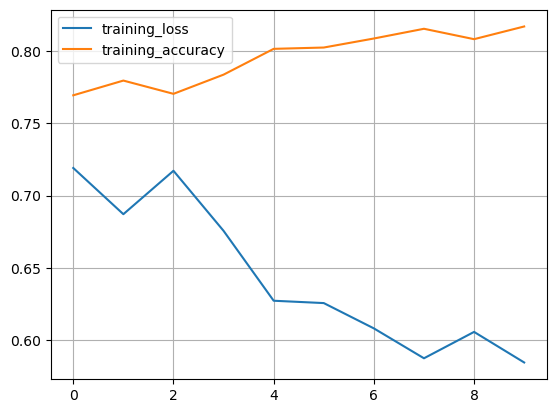

In [31]:
#Original Output
plt.plot(results.history['loss'], label = 'training_loss')
plt.plot(results.history['accuracy'], label = 'training_accuracy')
plt.legend()
plt.grid(True)

In [32]:
#Original output
color_to_class_mapping = {
    (0, 0, 0): 0,
    (0, 0, 142): 1,
    (70, 70, 70): 2,
    (70, 130, 180): 3,
    (107, 142, 35): 4,
    (119, 11, 32): 5,
    (128, 64, 128): 6,
    (152, 251, 152): 7,
    (153, 153, 153): 8,
    (220, 20, 60): 9,
    (220, 220, 0): 10,
    (244, 35, 232): 11,
    (255, 0, 0): 12
}
class_to_color_mapping = {v: k for k, v in color_to_class_mapping.items()}
def class_index_to_rgb(class_indexed_mask, class_to_color_mapping):
    if class_indexed_mask.ndim != 2:
        raise ValueError("Expected 2D array for class_indexed_mask, but got shape {}".format(class_indexed_mask.shape))
    height, width = class_indexed_mask.shape
    rgb_mask = np.zeros((height, width, 3), dtype=np.uint8)
    for class_idx, rgb_color in class_to_color_mapping.items():
        rgb_mask[class_indexed_mask == class_idx] = rgb_color

    return rgb_mask
model = tf.keras.models.load_model(dir +'/Semantic_segmentation_model.keras')


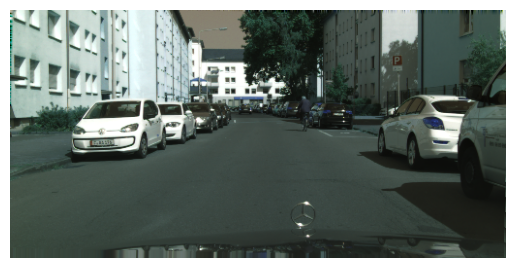

In [33]:
im = cv2.imread(dir_2 + '/frankfurt_000000_000576_leftImg8bit.png')
im = resize_image(im, (512, 256))
plt.imshow(im)
plt.axis('off')
plt.show()

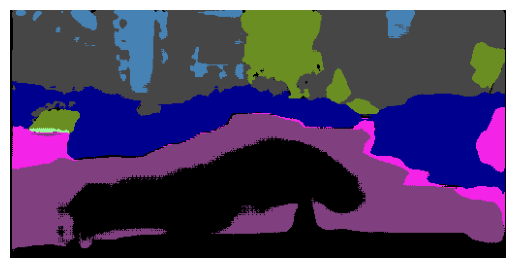

In [34]:
#Original OUTPUT
plt.imshow(class_index_to_rgb(output_int[0], class_to_color_mapping))
plt.axis('off')
plt.show()

In [35]:
len(class_index_to_rgb(output_int[0], class_to_color_mapping))

256

In [41]:
import cv2
import numpy as np

# Functions for resizing and normalizing
def resize_image(img, size):
    return cv2.resize(img, size)

def normalize_image(img):
    return img / 255.0  # Normalize pixel values to [0, 1]

# Corrected Image Path
image_path = 'C:\\Users\\deeks_w4ub1k8\\Documents\\Dataset numpy array(converted)\\frankfurt_000000_003025_leftImg8bit.png'

# Attempt to read the image
image = cv2.imread(image_path)

# Error Handling
if image is None:
    print(f"Error: Could not read image from path: {image_path}")
    # Handle the error (exit, skip processing, etc.)
else:
    # Preprocess the image
    resized_image = resize_image(image, (512, 256))
    normalized_image = normalize_image(resized_image)

    # Assuming `model` is already loaded
    output1 = model.predict(np.array([normalized_image]))  # Add batch dimension
    output1_int = np.argmax(output1, axis=-1)

    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


In [38]:
print(len(class_index_to_rgb(output1_int[0], class_to_color_mapping)))

256


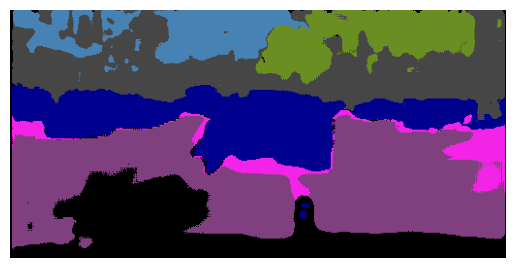

In [39]:
plt.imshow(class_index_to_rgb(output1_int[0], class_to_color_mapping))
plt.axis('off')
plt.show()

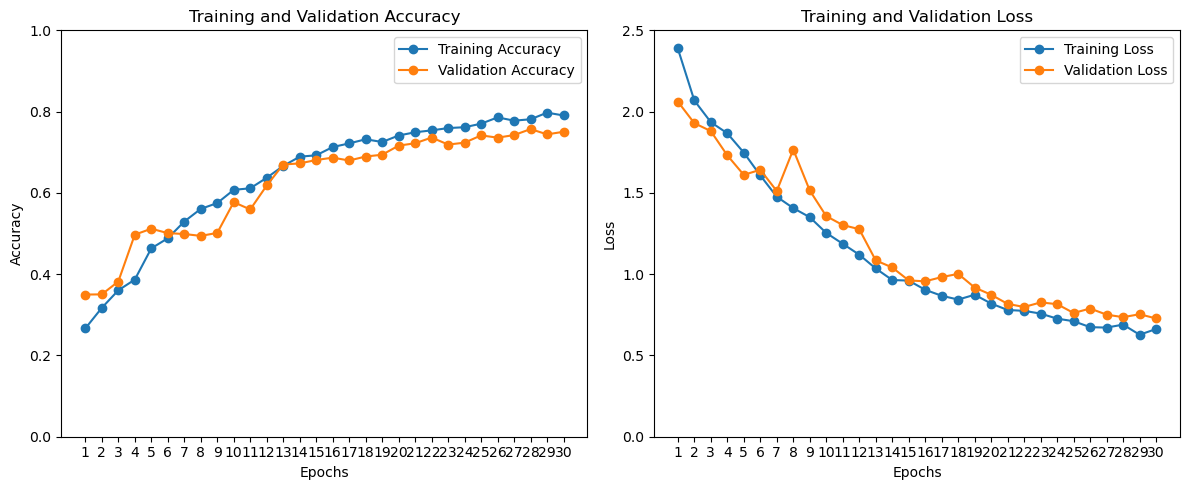

In [40]:
import matplotlib.pyplot as plt

# Epochs from 1 to 30
epochs = range(1, 31)

# Training and validation accuracies
train_accuracy = [0.2665, 0.3171, 0.3603, 0.3866, 0.4635,
                  0.4883, 0.5295, 0.5606, 0.5750, 0.6075,
                  0.6113, 0.6372, 0.6663, 0.6891, 0.6925,
                  0.7128, 0.7218, 0.7319, 0.7252, 0.7412,
                  0.7492, 0.7538, 0.7595, 0.7616, 0.7703,
                  0.7858, 0.7777, 0.7812, 0.7974, 0.7905]

val_accuracy = [0.3498, 0.3503, 0.3819, 0.4972, 0.5118,
                0.5010, 0.4988, 0.4942, 0.5015, 0.5772,
                0.5592, 0.6182, 0.6698, 0.6726, 0.6809,
                0.6867, 0.6797, 0.6895, 0.6939, 0.7163,
                0.7221, 0.7362, 0.7189, 0.7236, 0.7415,
                0.7359, 0.7423, 0.7570, 0.7440, 0.7504]

# Training and validation losses
train_loss = [2.3884, 2.0686, 1.9352, 1.8666, 1.7479,
              1.6075, 1.4763, 1.4063, 1.3504, 1.2537,
              1.1869, 1.1199, 1.0351, 0.9640, 0.9604,
              0.9038, 0.8671, 0.8437, 0.8734, 0.8192,
              0.7795, 0.7744, 0.7574, 0.7263, 0.7106,
              0.6741, 0.6713, 0.6897, 0.6274, 0.6626]

val_loss = [2.0618, 1.9290, 1.8802, 1.7309, 1.6108,
            1.6423, 1.5115, 1.7668, 1.5148, 1.3570,
            1.3022, 1.2768, 1.0848, 1.0412, 0.9615,
            0.9560, 0.9820, 1.0018, 0.9177, 0.8733,
            0.8171, 0.7981, 0.8263, 0.8155, 0.7612,
            0.7886, 0.7509, 0.7355, 0.7535, 0.7276]

# Plotting Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.ylim(0, 1)  # Set y-axis limits to show accuracy scale
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.ylim(0, 2.5)  # Set y-axis limits to show loss scale
plt.legend()

plt.tight_layout()
plt.show()


In [44]:
import cv2
import numpy as np

def process_video(video_path, output_path, model):
    """Processes a video frame-by-frame using a pre-trained model.

    Args:
        video_path: Path to the input video file.
        output_path: Path to save the output video file.
        model: The pre-trained Keras model for semantic segmentation.  
    """

    # Open the input video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video file.")
        return

    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    # Create a VideoWriter object to save the output video
    fourcc = cv2.VideoWriter_fourcc(*'XVID')  # You can choose a different codec if needed
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    while True:
        # Read a frame from the video
        ret, frame = cap.read()
        if not ret:
            break  # End of video

        # Preprocess the frame (resize, normalize)
        resized_frame = resize_image(frame, (512, 256))
        normalized_frame = normalize_image(resized_frame)

        # Make prediction using the model
        prediction = model.predict(np.expand_dims(normalized_frame, axis=0))
        segmented_frame = class_index_to_rgb(np.argmax(prediction[0], axis=-1), class_to_color_mapping)

        # Resize the segmented frame back to the original size
        segmented_frame = cv2.resize(segmented_frame, (frame_width, frame_height), interpolation=cv2.INTER_NEAREST)

        # Write the segmented frame to the output video
        out.write(segmented_frame)

    # Release resources
    cap.release()
    out.release()

    print(f"Output video saved to: {output_path}")


# Example usage
video_path = 'C:\\Users\\deeks_w4ub1k8\\Documents\\Dataset numpy array(converted)\\output_video.mp4'
output_path = 'C:\\Users\\deeks_w4ub1k8\\Documents\\Dataset numpy array(converted)\\output_video.avi'  # Change extension if needed
process_video(video_path, output_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━